# Problem Statement : 
### This is an assignment to build a multiple linear regression model for the prediction of demand for shared bikes.

In [1]:
# In order to exclude warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option('max_column',200)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [3]:
# Reading the data file storing in a dataframe
df = pd.read_csv('day.csv',parse_dates=['dteday'])
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-08-01,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-09-01,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-10-01,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
# Reviewing the shape of dataframe
df.shape

(730, 16)

In [5]:
# Reviewing the datatypes information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
# summary of all numeric columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Initial Observations:
- Target variable here is 'cnt' : count of total rental bikes
- Column 'instant' seems like serial number column and 'dteday' is date column. Both doesn't seem to make any impact in modelling and could thereby be excluded.
- We observe lot of categorical columns (season, year, month, holiday, weekday, workingday, weathersituation) are having numerical data (int64) which may not infer exact sense of the data. Also, being in int64 format internally ranks the categories basis the number, which is not desired case and may cause serious issues while modelling.
- Column 'casual' & 'registered' add up to give the total count (cnt) and maythus lead to multicollinearity and could thus be sxcluded as well.

In [7]:
# Droping 'instant' & 'date' column
df.drop(['instant','dteday'],axis=1,inplace=True)
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


### Categorising the columns appropriately

In [8]:
# reviewing feature 'season'
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
# labelling seasons as per data dictionary by creating a function: (1:spring, 2:summer, 3:fall, 4:winter)
def season_cat(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'
    
df['season']=df['season'].apply(season_cat)

In [10]:
# re-check
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# reviewing feature 'season'
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [12]:
# labelling months as per data dictionary using map function: month (1 to 12)
df[['mnth']]=df[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))


In [13]:
#re-check
df.mnth.value_counts()

Jan    62
Dec    62
Aug    62
Mar    62
Oct    62
Jul    62
May    62
Nov    60
Apr    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [14]:
# reviewing feature 'year'
df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [15]:
# labelling year as per data dictionary using map function: year (0: 2018, 1:2019)
df[['yr']]=df[['yr']].apply(lambda x: x.map({0:'2018',1:'2019'}))

In [16]:
# re-check
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [17]:
# reviewing feature 'holiday'
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
# labelling holiday as per data dictionary using map function:
df[['holiday']]=df[['holiday']].apply(lambda x: x.map({0:'No',1:'Yes'}))

In [19]:
# re-check
df.holiday.value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [20]:
# reviewing feature 'weekday'
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [21]:
# labelling weekday as per data dictionary using map function: day of the week
df[['weekday']]=df[['weekday']].apply(lambda x: x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}))

In [22]:
# re-check
df.weekday.value_counts()

Tue    105
Mon    105
Sun    104
Fri    104
Thu    104
Wed    104
Sat    104
Name: weekday, dtype: int64

In [23]:
# reviewing feature 'working day'
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [24]:
# labelling workingday as per data dictionary using map function: neither weekend nor holiday is 1, otherwise is 0.
df[['workingday']]=df[['workingday']].apply(lambda x: x.map({0:'No',1:'Yes'}))

In [25]:
# re-check
df.workingday.value_counts()

Yes    504
No     226
Name: workingday, dtype: int64

In [26]:
# reviewing feature 'weathersit'
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
# labelling weather situation as per data dictionary using map function: 1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain
df[['weathersit']]=df[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Mist',3:'Light_Rain',4:'Heavy_Rain'}))

In [28]:
# re-check
df.weathersit.value_counts()

Clear         463
Mist          246
Light_Rain     21
Name: weathersit, dtype: int64

### Rechecking the modified dataframe

In [29]:
# modified datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [30]:
# data set (top 5 rows)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Mon,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tue,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### So all our categorical columns are now modified to desired datatype (from int64)

In [31]:
# numercial dataset details
df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualizing

<Figure size 864x720 with 0 Axes>

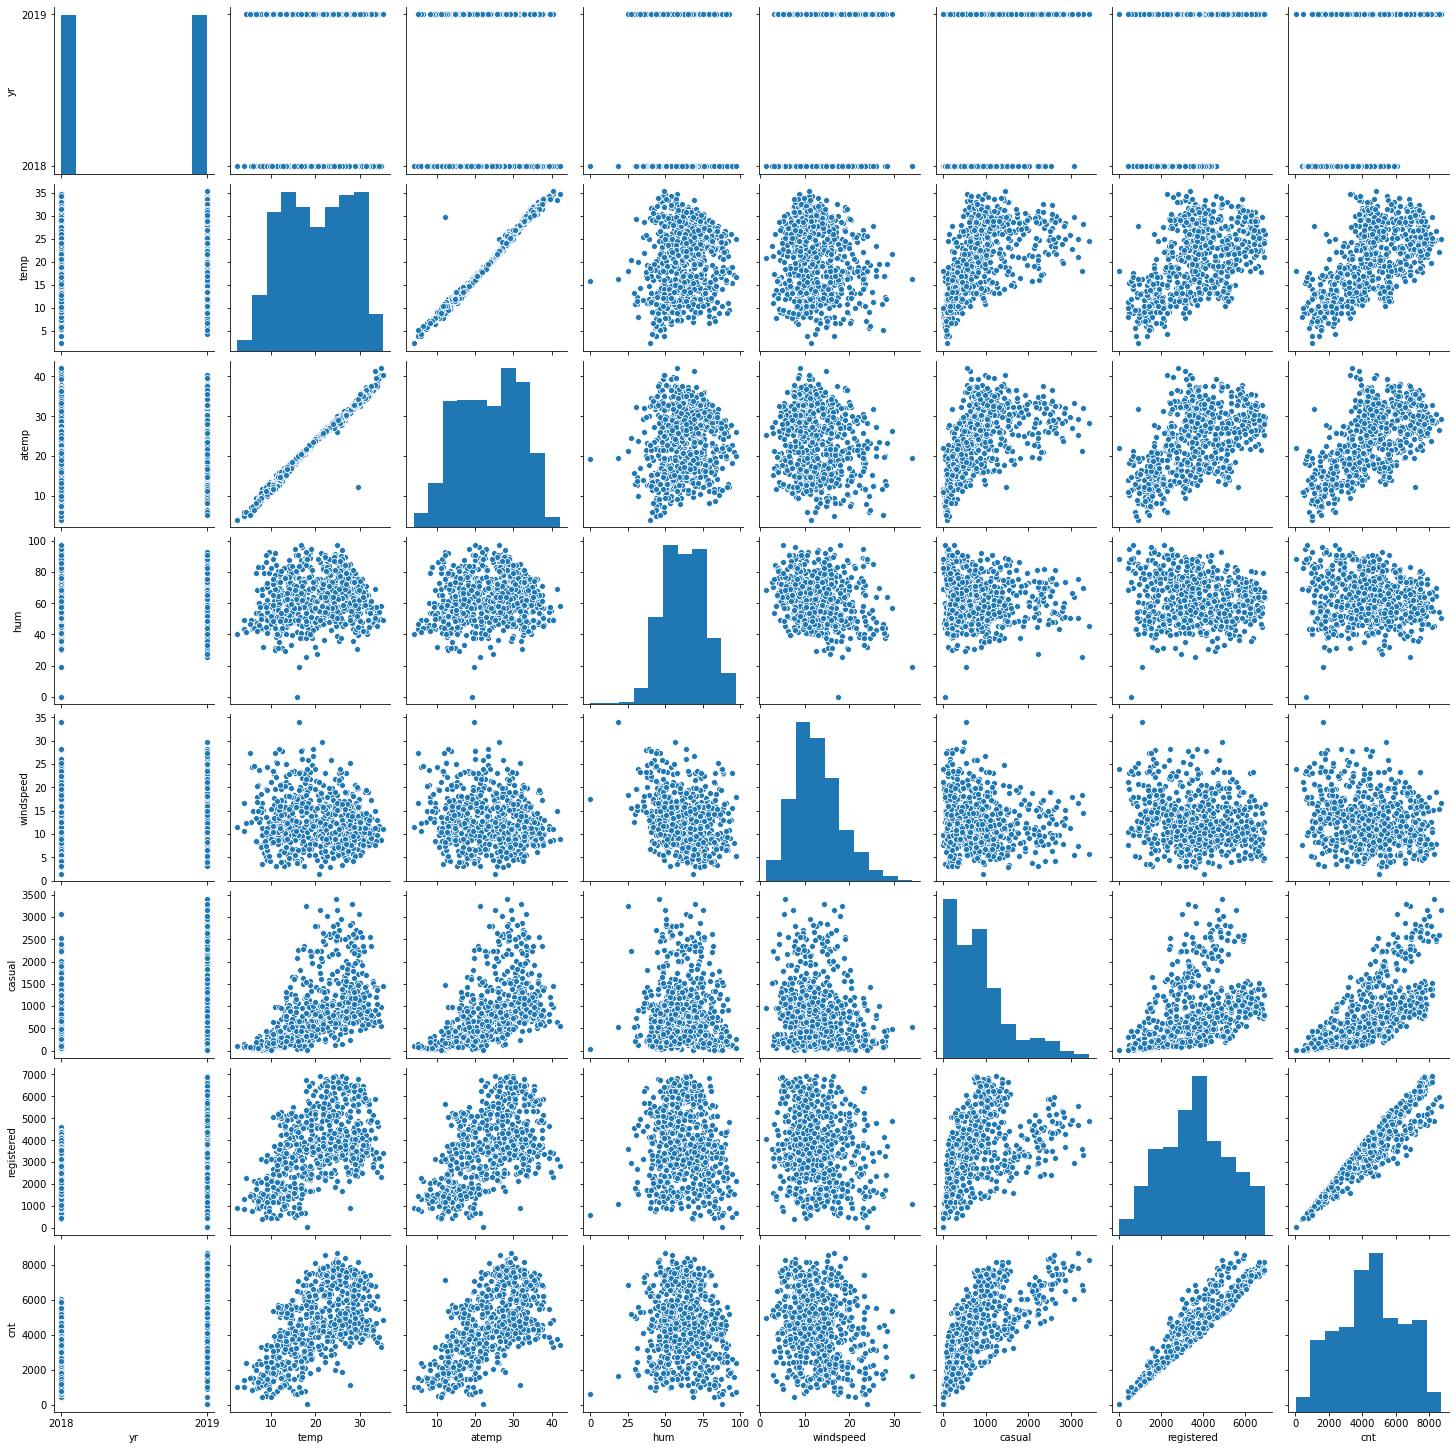

In [32]:
# Visualizing numerical data

plt.figure(figsize=(12,10))
sns.pairplot(df)
plt.show()

<Figure size 864x720 with 0 Axes>

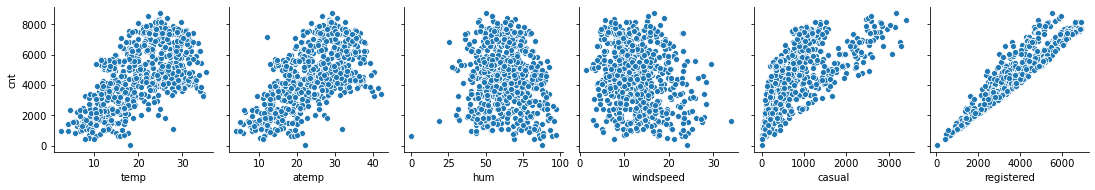

In [33]:
# Visualizing numerical data relation with target variable

num_var=['temp','atemp','hum','windspeed','casual','registered']  #numerical variables

plt.figure(figsize=(12,10))
sns.pairplot(df, x_vars=num_var,y_vars='cnt')
plt.show()

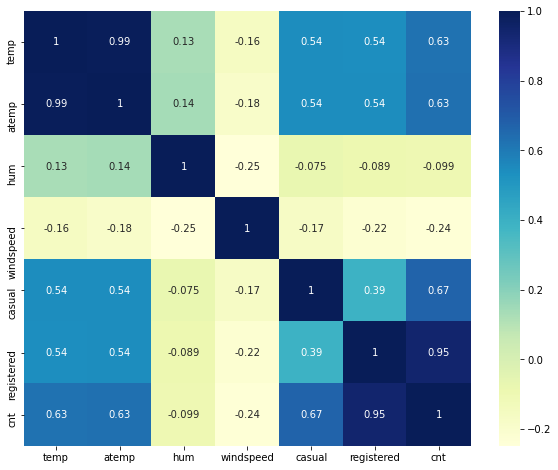

In [34]:
#checking correlation among numerical variables (incl. target variable)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Observations:
- we observe 'linear relation' among target and independent variables
- temp & atemp almost follows similar trend over pair plot & is evdident over heatmap that both are highly correlated (Multicollinearity).
- casual & registered almost follows similar trend (over pair plot) & is evident over heatmap too as both are significantly correlated (they add up to give 'cnt')(Multicollinearity)
- Windspeed having negative correlation denotes that poeple refrain from renting bikes when windspeed is high. Similary in case of humidity.

#### Hence we may drop one out of temp/atemp and both casual & registered columns since their contribution can be covered within 'cnt' variable itself.

In [35]:
# Dropping atemp, casual & registered features
df.drop(['atemp','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No,Mon,Yes,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No,Tue,Yes,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,43.6957,12.522300,1600


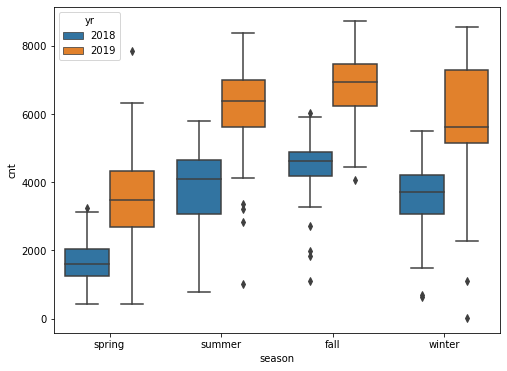

In [36]:
# Visualizing categorical data relation with target variable

# season
plt.figure(figsize=(8,6))
sns.boxplot(x='season',y='cnt',data=df,hue='yr')
plt.show()

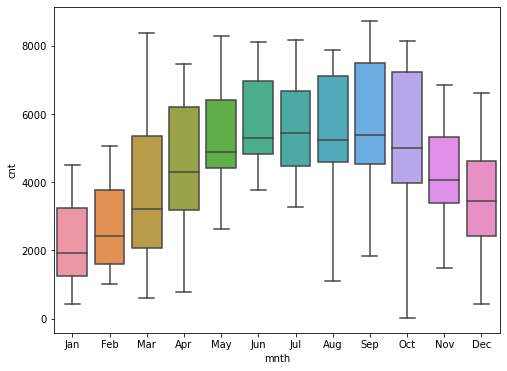

In [37]:
# month

plt.figure(figsize=(8,6))
sns.boxplot(x='mnth',y='cnt',data=df)
plt.show()

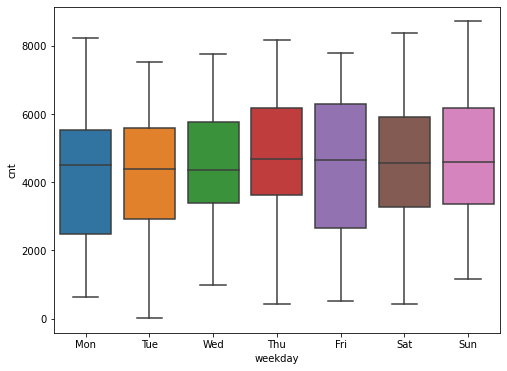

In [38]:
# weekday

plt.figure(figsize=(8,6))
sns.boxplot(x='weekday',y='cnt',data=df)
plt.show()

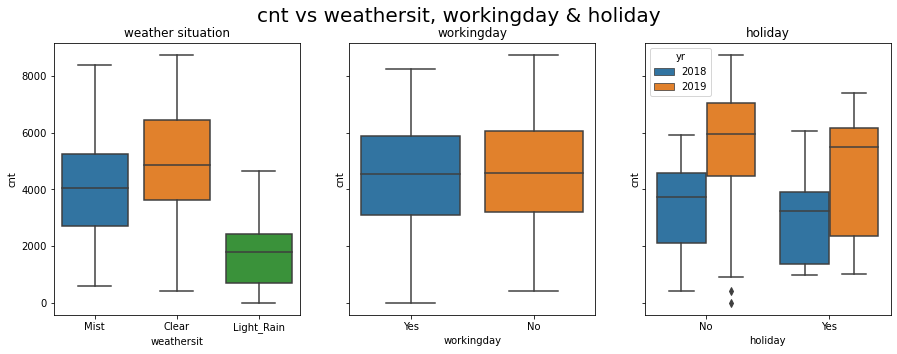

In [39]:
# weathersit, workingday & holiday

fig, ax = plt.subplots(1,3,figsize=(15,5),sharey= True)
fig.suptitle('cnt vs weathersit, workingday & holiday',fontsize=20)
sns.boxplot(ax=ax[0], x='weathersit',y='cnt',data=df)
ax[0].set_title('weather situation')
sns.boxplot(ax=ax[1], x='workingday',y='cnt',data=df)
ax[1].set_title('workingday')
sns.boxplot(ax=ax[2], x='holiday',y='cnt',data=df,hue='yr')
ax[2].set_title('holiday')
plt.show()

#### Observation:
- Business linearly rose from 2018 to 2019
- Overall requirement varies linearly over months varying seasonally from spring to fall.
- Median business is almost same over all the weekdays with bit more demand towards weekends (Fri-Mon)
- Demand is more when whether is Clear and decreses when its Rainy.

#### Performing dummy encoding over categorical variables

In [40]:
#checking available variables & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [41]:
# grouping all categorical variables to perfrom OHE using get_dummies()

df_categorical1=df.select_dtypes(include=['object'])

In [42]:
# OHE ; Creating a dummy dataframe having all the dummy encoding for our categorical variables

df_dummy = pd.get_dummies(df_categorical1,drop_first=True) #(drop_first: to drop the redundant column, thereby removing multicolliearity created)
df_dummy

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light_Rain,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
726,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
727,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [43]:
df_dummy.shape

(730, 25)

In [44]:
# Since we have encoded all our categorcal variables into dummy dataframe, we can drop the actual 
# columns from the main df dataframe and further add the dummy variables into df

df.drop(df_categorical1.columns,axis=1,inplace=True)

In [45]:
# concatenating the two datasets (df & df_dummy)
df = pd.concat([df,df_dummy],axis=1)

In [46]:
# reviewing new dataset
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light_Rain,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
df.shape

(730, 29)

#### So now we have final data set with excluded redundant features and in appropriate format to perform regression

## Train-Test split

In [48]:
# Splitting training and test data set in the ratio of 70:30 from the main data set
df_train, df_test = train_test_split(df,train_size=0.7,random_state=100)

In [49]:
# verifying so created structure

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Scaling

In [50]:
# Scaling numerical columns : to bring various features within a small interpretable range. Also, it significantly reduces time of convergence while gradient decent.

# initialising the MinMax scaler : (MinMax scaling also known as Normalization normalizes the value within range of 0-1)
scaler = MinMaxScaler()

#choosing the features to scale
scaler_var = ['temp','hum','windspeed','cnt']

# fitting on the data: scaling only selected/numerical features
df_train[scaler_var]=scaler.fit_transform(df_train[scaler_var]) # In 'fit_transform', 'fit' learns the min max of variables and 'transform' computes and applies the scaling over varibles

In [51]:
# reviewing scaled train data set
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light_Rain,weathersit_Mist
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Model Building

In [52]:
# splitting the data set further to independent(X_train) and dependent/target(y_train) variable
y_train = df_train.pop('cnt')
X_train = df_train

In [53]:
# Building Model I : by including all features and then removing (worst) one at a time

# adding constant term to the X_train set, as Statsmodel do not take constant into account
X_train_sm = sm.add_constant(X_train)  # sm : statsmodel

# applying 'Ordinary Least Square' method and fitting to create the LR(Linear Regression) model
lr = sm.OLS(y_train, X_train_sm).fit()

In [54]:
# checking created LR model parameters : gives all the cofficients and constant term
lr.params

const                    0.391163
temp                     0.440512
hum                     -0.157355
windspeed               -0.182486
season_spring           -0.040386
season_summer            0.046443
season_winter            0.112621
yr_2019                  0.231135
mnth_Aug                 0.027307
mnth_Dec                -0.044387
mnth_Feb                -0.037422
mnth_Jan                -0.064209
mnth_Jul                -0.028504
mnth_Jun                 0.008393
mnth_Mar                 0.000800
mnth_May                 0.024732
mnth_Nov                -0.039553
mnth_Oct                 0.005634
mnth_Sep                 0.090823
holiday_Yes             -0.134754
weekday_Mon             -0.024621
weekday_Sat             -0.055719
weekday_Sun             -0.049460
weekday_Thu              0.004227
weekday_Tue             -0.026072
weekday_Wed             -0.010225
workingday_Yes          -0.060049
weathersit_Light_Rain   -0.249947
weathersit_Mist         -0.057848
dtype: float64

In [55]:
# reviewing Statsmodel summary for the created model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.34e-178
Time:                        13:38:08   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3912      0.085      4.594      0.000       0.224       0.558
temp                      0.4405      0.047      9.412      0.000       0.349       0.532
hum                      -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed                -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_spring            -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_summer             0.0464      0.026      1.761      0.079      -0.005       0.098
season_winter             0.1126      0.028      3.994      0.000       0.057       0.168
yr_2019                   0.2311      0.008     28.384      0.000       0.215       0.247
mnth_Aug                  0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_Dec                 -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_Feb                 -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_Jan                 -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_Jul                 -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_Jun                  0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_Mar                  0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May                  0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_Nov                 -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_Oct                  0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_Sep                  0.0908      0.032      2.822      0.005       0.028       0.154
holiday_Yes              -0.1348      0.065     -2.059      0.040      -0.263      -0.006
weekday_Mon              -0.0246      0.015     -1.687      0.092      -0.053       0.004
weekday_Sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
weekday_Sun              -0.0495      0.072     -0.691      0.490      -0.190       0.091
weekday_Thu               0.0042      0.015      0.282      0.778      -0.025       0.034
weekday_Tue              -0.0261      0.015     -1.774      0.077      -0.055       0.003
weekday_Wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
workingday_Yes           -0.0600      0.071     -0.844      0.399      -0.200       0.080
weathersit_Light_Rain    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
weathersit_Mist          -0.0578      0.011     -5.495      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarqu

In [56]:
# calculating VIF (Variance Inflation factor): It calculates the degree of correlation between variables. Higher the value, higer correlation

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)

In [57]:
# reviewing VIF values
vif

,Features,VIF
25,workingday_Yes,63.89
0,temp,43.77
1,hum,41.18
3,season_spring,13.50
5,season_winter,12.40
21,weekday_Sun,12.34
20,weekday_Sat,11.83
4,season_summer,9.85
15,mnth_Nov,7.16
16,mnth_Oct,6.82


#### Observations
- Achieved a model having R-squared:'0.850' & Adj. R-squared:'0.841', which is although good, but looking at the p-value & VIF of features, there seems to be opportunity of correction
- mnth_Mar: Is one of the features that is gaving highest p-value of 0.974 (& a VIF of 3.72): Therefore will try to drop this feature, as dropping variable wih high p-value & then recalculating VIF again, shows decrease in VIF values of features.

In [58]:
# Dropping 'mnth_Mar' variable from the train data set (X_train)
X_train = X_train.drop('mnth_Mar',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [59]:
# reviewing Statsmodel summary for the created model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.32e-179
Time:                        13:38:08   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3917      0.084      4.684      0.000       0.227       0.556
temp                      0.4403      0.046      9.550      0.000       0.350       0.531
hum                      -0.1573      0.039     -4.057      0.000      -0.233      -0.081
windspeed                -0.1825      0.026     -7.020      0.000      -0.234      -0.131
season_spring            -0.0401      0.029     -1.401      0.162      -0.096       0.016
season_summer             0.0463      0.026      1.790      0.074      -0.005       0.097
season_winter             0.1128      0.028      4.075      0.000       0.058       0.167
yr_2019                   0.2311      0.008     28.414      0.000       0.215       0.247
mnth_Aug                  0.0269      0.032      0.843      0.399      -0.036       0.090
mnth_Dec                 -0.0451      0.026     -1.718      0.086      -0.097       0.006
mnth_Feb                 -0.0382      0.022     -1.699      0.090      -0.082       0.006
mnth_Jan                 -0.0650      0.023     -2.883      0.004      -0.109      -0.021
mnth_Jul                 -0.0288      0.034     -0.858      0.391      -0.095       0.037
mnth_Jun                  0.0081      0.024      0.344      0.731      -0.038       0.055
mnth_May                  0.0245      0.020      1.233      0.218      -0.015       0.064
mnth_Nov                 -0.0402      0.031     -1.293      0.197      -0.101       0.021
mnth_Oct                  0.0050      0.031      0.162      0.871      -0.056       0.066
mnth_Sep                  0.0904      0.029      3.092      0.002       0.033       0.148
holiday_Yes              -0.1348      0.065     -2.061      0.040      -0.263      -0.006
weekday_Mon              -0.0246      0.015     -1.692      0.091      -0.053       0.004
weekday_Sat              -0.0557      0.072     -0.778      0.437      -0.196       0.085
weekday_Sun              -0.0494      0.072     -0.691      0.490      -0.190       0.091
weekday_Thu               0.0042      0.015      0.283      0.778      -0.025       0.034
weekday_Tue              -0.0261      0.015     -1.778      0.076      -0.055       0.003
weekday_Wed              -0.0102      0.015     -0.671      0.503      -0.040       0.020
workingday_Yes           -0.0600      0.071     -0.845      0.399      -0.200       0.080
weathersit_Light_Rain    -0.2499      0.027     -9.390      0.000      -0.302      -0.198
weathersit_Mist          -0.0579      0.011     -5.502      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.533
Skew:                          -0.762   Prob(JB):       

In [60]:
# calculating VIF (Variance Inflation factor): It calculates the degree of correlation between variables. Higher the value, higer correlation

vif1 = pd.DataFrame()
vif1['Features'] = X_train.columns
vif1['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif1['VIF'] = round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)

In [61]:
# reviewing VIF1 values
vif1

,Features,VIF
24,workingday_Yes,57.64
0,temp,43.12
1,hum,40.57
5,season_winter,11.85
3,season_spring,11.56
20,weekday_Sun,11.11
19,weekday_Sat,10.72
4,season_summer,9.64
7,mnth_Aug,6.15
2,windspeed,5.59


##### Again, after dropping mnth_Mar, we have r-squared & adj. r-squared of 0.85 & 0.842 (better), however we still see high p-value features and a very high VIF. Thus a scope of further enhancement. This will go on till we have achieved a model where features has p-value of < 0.05 and VIF around 5.

In [62]:
# Dropping 'mnth_Oct' (p-value: 0.871) variable from the train data set (X_train)
X_train = X_train.drop('mnth_Oct',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr2 = sm.OLS(y_train, X_train_sm).fit()

In [63]:
# reviewing Statsmodel summary for the created model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.29e-180
Time:                        13:38:08   Log-Likelihood:                 522.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     483   BIC:                            -877.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3932      0.083      4.736      0.000       0.230       0.556
temp                      0.4407      0.046      9.587      0.000       0.350       0.531
hum                      -0.1567      0.039     -4.065      0.000      -0.232      -0.081
windspeed                -0.1824      0.026     -7.026      0.000      -0.233      -0.131
season_spring            -0.0410      0.028     -1.467      0.143      -0.096       0.014
season_summer             0.0447      0.024      1.872      0.062      -0.002       0.092
season_winter             0.1149      0.024      4.701      0.000       0.067       0.163
yr_2019                   0.2311      0.008     28.466      0.000       0.215       0.247
mnth_Aug                  0.0249      0.029      0.848      0.397      -0.033       0.083
mnth_Dec                 -0.0481      0.019     -2.586      0.010      -0.085      -0.012
mnth_Feb                 -0.0390      0.022     -1.783      0.075      -0.082       0.004
mnth_Jan                 -0.0658      0.022     -2.991      0.003      -0.109      -0.023
mnth_Jul                 -0.0309      0.031     -0.990      0.323      -0.092       0.030
mnth_Jun                  0.0072      0.023      0.314      0.754      -0.038       0.052
mnth_May                  0.0241      0.020      1.224      0.222      -0.015       0.063
mnth_Nov                 -0.0441      0.019     -2.289      0.022      -0.082      -0.006
mnth_Sep                  0.0879      0.025      3.527      0.000       0.039       0.137
holiday_Yes              -0.1347      0.065     -2.062      0.040      -0.263      -0.006
weekday_Mon              -0.0245      0.015     -1.687      0.092      -0.053       0.004
weekday_Sat              -0.0559      0.072     -0.782      0.435      -0.196       0.085
weekday_Sun              -0.0497      0.071     -0.696      0.487      -0.190       0.091
weekday_Thu               0.0043      0.015      0.285      0.776      -0.025       0.034
weekday_Tue              -0.0261      0.015     -1.779      0.076      -0.055       0.003
weekday_Wed              -0.0102      0.015     -0.668      0.504      -0.040       0.020
workingday_Yes           -0.0603      0.071     -0.850      0.396      -0.200       0.079
weathersit_Light_Rain    -0.2498      0.027     -9.398      0.000      -0.302      -0.198
weathersit_Mist          -0.0579      0.011     -5.514      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       77.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.904
Skew:                          -0.758   Prob(JB):                     8.71e-45
Kurtosis:                       5.692   Cond. No.                  

In [64]:
# calculating VIF (Variance Inflation factor)

vif2 = pd.DataFrame()
vif2['Features'] = X_train.columns
vif2['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif2['VIF'] = round(vif2['VIF'],2)
vif2 = vif2.sort_values(by='VIF',ascending=False)

In [65]:
# reviewing VIF2 values
vif2

,Features,VIF
23,workingday_Yes,56.51
0,temp,42.75
1,hum,39.94
3,season_spring,11.18
19,weekday_Sun,10.87
18,weekday_Sat,10.47
5,season_winter,8.98
4,season_summer,8.34
2,windspeed,5.57
7,mnth_Aug,5.27


In [66]:
# Dropping 'weekday_Thu' (p-value: 0.776) variable from the train data set (X_train)
X_train = X_train.drop('weekday_Thu',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr3 = sm.OLS(y_train, X_train_sm).fit()

In [67]:
# reviewing Statsmodel summary for the created model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.27e-181
Time:                        13:38:08   Log-Likelihood:                 522.93
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3953      0.083      4.785      0.000       0.233       0.558
temp                      0.4409      0.046      9.600      0.000       0.351       0.531
hum                      -0.1570      0.038     -4.080      0.000      -0.233      -0.081
windspeed                -0.1825      0.026     -7.039      0.000      -0.233      -0.132
season_spring            -0.0412      0.028     -1.473      0.141      -0.096       0.014
season_summer             0.0448      0.024      1.881      0.061      -0.002       0.092
season_winter             0.1150      0.024      4.712      0.000       0.067       0.163
yr_2019                   0.2311      0.008     28.512      0.000       0.215       0.247
mnth_Aug                  0.0249      0.029      0.848      0.397      -0.033       0.083
mnth_Dec                 -0.0484      0.019     -2.609      0.009      -0.085      -0.012
mnth_Feb                 -0.0388      0.022     -1.775      0.077      -0.082       0.004
mnth_Jan                 -0.0658      0.022     -2.993      0.003      -0.109      -0.023
mnth_Jul                 -0.0307      0.031     -0.985      0.325      -0.092       0.031
mnth_Jun                  0.0068      0.023      0.299      0.765      -0.038       0.052
mnth_May                  0.0241      0.020      1.224      0.222      -0.015       0.063
mnth_Nov                 -0.0443      0.019     -2.302      0.022      -0.082      -0.006
mnth_Sep                  0.0879      0.025      3.528      0.000       0.039       0.137
holiday_Yes              -0.1347      0.065     -2.064      0.040      -0.263      -0.006
weekday_Mon              -0.0266      0.013     -2.120      0.034      -0.051      -0.002
weekday_Sat              -0.0578      0.071     -0.813      0.417      -0.198       0.082
weekday_Sun              -0.0516      0.071     -0.726      0.468      -0.191       0.088
weekday_Tue              -0.0282      0.013     -2.234      0.026      -0.053      -0.003
weekday_Wed              -0.0123      0.013     -0.918      0.359      -0.039       0.014
workingday_Yes           -0.0601      0.071     -0.848      0.397      -0.199       0.079
weathersit_Light_Rain    -0.2505      0.026     -9.476      0.000      -0.302      -0.199
weathersit_Mist          -0.0580      0.010     -5.529      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       77.776   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.211
Skew:                          -0.761   Prob(JB):                     4.53e-45
Kurtosis:                       5.701   Cond. No.                         69.7
==============================================================================

In [68]:
# calculating VIF (Variance Inflation factor)

vif3 = pd.DataFrame()
vif3['Features'] = X_train.columns
vif3['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif3['VIF'] = round(vif3['VIF'],2)
vif3 = vif3.sort_values(by='VIF',ascending=False)

In [69]:
# reviewing VIF3 values
vif3

,Features,VIF
22,workingday_Yes,54.72
0,temp,42.69
1,hum,39.94
3,season_spring,11.18
19,weekday_Sun,10.86
18,weekday_Sat,10.46
5,season_winter,8.97
4,season_summer,8.32
2,windspeed,5.57
7,mnth_Aug,5.27


In [70]:
# Dropping 'mnth_Jun' (p-value: 0.765) variable from the train data set (X_train)
X_train = X_train.drop('mnth_Jun',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr4 = sm.OLS(y_train, X_train_sm).fit()

In [71]:
# reviewing Statsmodel summary for the created model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.22e-182
Time:                        13:38:08   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3950      0.083      4.786      0.000       0.233       0.557
temp                      0.4482      0.039     11.556      0.000       0.372       0.524
hum                      -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed                -0.1833      0.026     -7.121      0.000      -0.234      -0.133
season_spring            -0.0434      0.027     -1.618      0.106      -0.096       0.009
season_summer             0.0436      0.023      1.859      0.064      -0.002       0.090
season_winter             0.1125      0.023      4.917      0.000       0.068       0.157
yr_2019                   0.2309      0.008     28.619      0.000       0.215       0.247
mnth_Aug                  0.0198      0.024      0.830      0.407      -0.027       0.067
mnth_Dec                 -0.0476      0.018     -2.595      0.010      -0.084      -0.012
mnth_Feb                 -0.0379      0.022     -1.752      0.080      -0.080       0.005
mnth_Jan                 -0.0644      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul                 -0.0363      0.025     -1.459      0.145      -0.085       0.013
mnth_May                  0.0214      0.017      1.225      0.221      -0.013       0.056
mnth_Nov                 -0.0439      0.019     -2.288      0.023      -0.082      -0.006
mnth_Sep                  0.0842      0.022      3.896      0.000       0.042       0.127
holiday_Yes              -0.1346      0.065     -2.064      0.040      -0.263      -0.006
weekday_Mon              -0.0263      0.013     -2.107      0.036      -0.051      -0.002
weekday_Sat              -0.0570      0.071     -0.803      0.422      -0.197       0.083
weekday_Sun              -0.0508      0.071     -0.716      0.474      -0.190       0.089
weekday_Tue              -0.0281      0.013     -2.228      0.026      -0.053      -0.003
weekday_Wed              -0.0122      0.013     -0.911      0.363      -0.038       0.014
workingday_Yes           -0.0593      0.071     -0.838      0.402      -0.198       0.080
weathersit_Light_Rain    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
weathersit_Mist          -0.0578      0.010     -5.526      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [72]:
# calculating VIF (Variance Inflation factor)

vif4 = pd.DataFrame()
vif4['Features'] = X_train.columns
vif4['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif4['VIF'] = round(vif4['VIF'],2)
vif4 = vif4.sort_values(by='VIF',ascending=False)

In [73]:
# reviewing VIF4 values
vif4

,Features,VIF
21,workingday_Yes,54.55
1,hum,39.11
0,temp,29.71
18,weekday_Sun,10.82
17,weekday_Sat,10.44
3,season_spring,10.24
4,season_summer,8.04
5,season_winter,7.81
2,windspeed,5.50
7,mnth_Aug,3.44


In [74]:
# Dropping 'weekday_Sun' (p-value:0.474 / VIF: 10.82) variable from the train data set (X_train)
X_train = X_train.drop('weekday_Sun',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr5 = sm.OLS(y_train, X_train_sm).fit()

In [75]:
# reviewing Statsmodel summary for the created model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.42e-183
Time:                        13:38:09   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3436      0.041      8.442      0.000       0.264       0.424
temp                      0.4490      0.039     11.588      0.000       0.373       0.525
hum                      -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed                -0.1838      0.026     -7.147      0.000      -0.234      -0.133
season_spring            -0.0431      0.027     -1.608      0.109      -0.096       0.010
season_summer             0.0437      0.023      1.863      0.063      -0.002       0.090
season_winter             0.1123      0.023      4.910      0.000       0.067       0.157
yr_2019                   0.2313      0.008     28.724      0.000       0.215       0.247
mnth_Aug                  0.0194      0.024      0.816      0.415      -0.027       0.066
mnth_Dec                 -0.0474      0.018     -2.584      0.010      -0.083      -0.011
mnth_Feb                 -0.0375      0.022     -1.736      0.083      -0.080       0.005
mnth_Jan                 -0.0641      0.021     -2.995      0.003      -0.106      -0.022
mnth_Jul                 -0.0367      0.025     -1.476      0.141      -0.085       0.012
mnth_May                  0.0211      0.017      1.209      0.227      -0.013       0.055
mnth_Nov                 -0.0451      0.019     -2.364      0.018      -0.083      -0.008
mnth_Sep                  0.0843      0.022      3.904      0.000       0.042       0.127
holiday_Yes              -0.0926      0.029     -3.247      0.001      -0.149      -0.037
weekday_Mon              -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_Sat              -0.0074      0.015     -0.483      0.629      -0.037       0.023
weekday_Tue              -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_Wed              -0.0109      0.013     -0.824      0.411      -0.037       0.015
workingday_Yes           -0.0095      0.013     -0.732      0.465      -0.035       0.016
weathersit_Light_Rain    -0.2503      0.026     -9.480      0.000      -0.302      -0.198
weathersit_Mist          -0.0578      0.010     -5.529      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.188
Skew:                          -0.765   Prob(JB):                     1.52e-43
Kurtosis:                       5.634   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# calculating VIF (Variance Inflation factor)

vif5 = pd.DataFrame()
vif5['Features'] = X_train.columns
vif5['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif5['VIF'] = round(vif5['VIF'],2)
vif5 = vif5.sort_values(by='VIF',ascending=False)

In [77]:
# reviewing VIF5 values
vif5

,Features,VIF
1,hum,34.32
0,temp,21.83
20,workingday_Yes,7.46
3,season_spring,7.37
5,season_winter,5.99
4,season_summer,5.87
2,windspeed,4.96
7,mnth_Aug,3.14
11,mnth_Jul,2.79
10,mnth_Jan,2.42


In [78]:
# Dropping 'weekday_Sat' (p-value: 0.629) variable from the train data set (X_train)
X_train = X_train.drop('weekday_Sat',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr6 = sm.OLS(y_train, X_train_sm).fit()

In [79]:
# reviewing Statsmodel summary for the created model
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.41e-184
Time:                        13:38:09   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3403      0.040      8.486      0.000       0.262       0.419
temp                      0.4486      0.039     11.590      0.000       0.373       0.525
hum                      -0.1575      0.038     -4.144      0.000      -0.232      -0.083
windspeed                -0.1835      0.026     -7.143      0.000      -0.234      -0.133
season_spring            -0.0436      0.027     -1.626      0.105      -0.096       0.009
season_summer             0.0434      0.023      1.852      0.065      -0.003       0.089
season_winter             0.1120      0.023      4.905      0.000       0.067       0.157
yr_2019                   0.2314      0.008     28.774      0.000       0.216       0.247
mnth_Aug                  0.0191      0.024      0.803      0.422      -0.028       0.066
mnth_Dec                 -0.0472      0.018     -2.578      0.010      -0.083      -0.011
mnth_Feb                 -0.0372      0.022     -1.726      0.085      -0.080       0.005
mnth_Jan                 -0.0641      0.021     -2.998      0.003      -0.106      -0.022
mnth_Jul                 -0.0367      0.025     -1.477      0.140      -0.085       0.012
mnth_May                  0.0210      0.017      1.205      0.229      -0.013       0.055
mnth_Nov                 -0.0456      0.019     -2.397      0.017      -0.083      -0.008
mnth_Sep                  0.0841      0.022      3.899      0.000       0.042       0.126
holiday_Yes              -0.0895      0.028     -3.223      0.001      -0.144      -0.035
weekday_Mon              -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_Tue              -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_Wed              -0.0108      0.013     -0.819      0.413      -0.037       0.015
workingday_Yes           -0.0059      0.011     -0.556      0.579      -0.027       0.015
weathersit_Light_Rain    -0.2508      0.026     -9.516      0.000      -0.303      -0.199
weathersit_Mist          -0.0577      0.010     -5.524      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.140   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.055
Skew:                          -0.755   Prob(JB):                     7.27e-43
Kurtosis:                       5.618   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# calculating VIF (Variance Inflation factor)

vif6 = pd.DataFrame()
vif6['Features'] = X_train.columns
vif6['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif6['VIF'] = round(vif6['VIF'],2)
vif6 = vif6.sort_values(by='VIF',ascending=False)

In [81]:
# reviewing VIF6 values
vif6

,Features,VIF
1,hum,34.11
0,temp,21.39
3,season_spring,7.17
5,season_winter,5.89
4,season_summer,5.74
19,workingday_Yes,5.15
2,windspeed,4.95
7,mnth_Aug,3.12
11,mnth_Jul,2.78
10,mnth_Jan,2.41


In [82]:
# Dropping 'workingday_Yes'(p-value:0.579 / VIF: 5.15) variable from the train data set (X_train)
X_train = X_train.drop('workingday_Yes',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr7 = sm.OLS(y_train, X_train_sm).fit()

In [83]:
# reviewing Statsmodel summary for the created model
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.41e-185
Time:                        13:38:09   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3374      0.040      8.492      0.000       0.259       0.415
temp                      0.4486      0.039     11.597      0.000       0.373       0.525
hum                      -0.1585      0.038     -4.180      0.000      -0.233      -0.084
windspeed                -0.1835      0.026     -7.148      0.000      -0.234      -0.133
season_spring            -0.0432      0.027     -1.615      0.107      -0.096       0.009
season_summer             0.0436      0.023      1.861      0.063      -0.002       0.090
season_winter             0.1124      0.023      4.927      0.000       0.068       0.157
yr_2019                   0.2314      0.008     28.798      0.000       0.216       0.247
mnth_Aug                  0.0195      0.024      0.821      0.412      -0.027       0.066
mnth_Dec                 -0.0470      0.018     -2.569      0.011      -0.083      -0.011
mnth_Feb                 -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul                 -0.0360      0.025     -1.453      0.147      -0.085       0.013
mnth_May                  0.0209      0.017      1.202      0.230      -0.013       0.055
mnth_Nov                 -0.0462      0.019     -2.433      0.015      -0.084      -0.009
mnth_Sep                  0.0844      0.022      3.916      0.000       0.042       0.127
holiday_Yes              -0.0841      0.026     -3.237      0.001      -0.135      -0.033
weekday_Mon              -0.0286      0.011     -2.513      0.012      -0.051      -0.006
weekday_Tue              -0.0300      0.012     -2.609      0.009      -0.053      -0.007
weekday_Wed              -0.0136      0.012     -1.107      0.269      -0.038       0.010
weathersit_Light_Rain    -0.2505      0.026     -9.513      0.000      -0.302      -0.199
weathersit_Mist          -0.0571      0.010     -5.500      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       74.723   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.138
Skew:                          -0.739   Prob(JB):                     1.90e-42
Kurtosis:                       5.619   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# calculating VIF (Variance Inflation factor)

vif7 = pd.DataFrame()
vif7['Features'] = X_train.columns
vif7['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif7['VIF'] = round(vif7['VIF'],2)
vif7 = vif7.sort_values(by='VIF',ascending=False)

In [85]:
# reviewing VIF7 values
vif7

,Features,VIF
1,hum,33.65
0,temp,21.17
3,season_spring,7.14
5,season_winter,5.88
4,season_summer,5.70
2,windspeed,4.94
7,mnth_Aug,3.12
11,mnth_Jul,2.78
10,mnth_Jan,2.41
20,weathersit_Mist,2.34


In [86]:
# Dropping 'mnth_Aug' (p-value: 0.412) variable from the train data set (X_train)
X_train = X_train.drop('mnth_Aug',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr8 = sm.OLS(y_train, X_train_sm).fit()

In [87]:
# reviewing Statsmodel summary for the created model
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.66e-186
Time:                        13:38:09   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3483      0.037      9.299      0.000       0.275       0.422
temp                      0.4510      0.039     11.695      0.000       0.375       0.527
hum                      -0.1572      0.038     -4.149      0.000      -0.232      -0.083
windspeed                -0.1837      0.026     -7.157      0.000      -0.234      -0.133
season_spring            -0.0557      0.022     -2.523      0.012      -0.099      -0.012
season_summer             0.0304      0.017      1.784      0.075      -0.003       0.064
season_winter             0.1009      0.018      5.614      0.000       0.066       0.136
yr_2019                   0.2316      0.008     28.843      0.000       0.216       0.247
mnth_Dec                 -0.0480      0.018     -2.627      0.009      -0.084      -0.012
mnth_Feb                 -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul                 -0.0499      0.018     -2.751      0.006      -0.085      -0.014
mnth_May                  0.0205      0.017      1.177      0.240      -0.014       0.055
mnth_Nov                 -0.0475      0.019     -2.506      0.013      -0.085      -0.010
mnth_Sep                  0.0733      0.017      4.371      0.000       0.040       0.106
holiday_Yes              -0.0847      0.026     -3.260      0.001      -0.136      -0.034
weekday_Mon              -0.0283      0.011     -2.489      0.013      -0.051      -0.006
weekday_Tue              -0.0302      0.012     -2.624      0.009      -0.053      -0.008
weekday_Wed              -0.0133      0.012     -1.090      0.276      -0.037       0.011
weathersit_Light_Rain    -0.2516      0.026     -9.568      0.000      -0.303      -0.200
weathersit_Mist          -0.0568      0.010     -5.474      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# calculating VIF (Variance Inflation factor)

vif8 = pd.DataFrame()
vif8['Features'] = X_train.columns
vif8['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif8['VIF'] = round(vif8['VIF'],2)
vif8 = vif8.sort_values(by='VIF',ascending=False)

In [89]:
# reviewing VIF8 values
vif8

,Features,VIF
1,hum,32.04
0,temp,18.41
3,season_spring,5.45
2,windspeed,4.87
5,season_winter,4.10
4,season_summer,3.35
9,mnth_Jan,2.38
19,weathersit_Mist,2.34
6,yr_2019,2.11
8,mnth_Feb,1.92


In [90]:
# Dropping 'weekday_Wed' (p-value: 0.276) variable from the train data set (X_train)
X_train = X_train.drop('weekday_Wed',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr9 = sm.OLS(y_train, X_train_sm).fit()

In [91]:
# reviewing Statsmodel summary for the created model
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          2.45e-187
Time:                        13:38:09   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3449      0.037      9.238      0.000       0.272       0.418
temp                      0.4530      0.039     11.758      0.000       0.377       0.529
hum                      -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed                -0.1827      0.026     -7.120      0.000      -0.233      -0.132
season_spring            -0.0548      0.022     -2.484      0.013      -0.098      -0.011
season_summer             0.0307      0.017      1.800      0.072      -0.003       0.064
season_winter             0.1004      0.018      5.589      0.000       0.065       0.136
yr_2019                   0.2314      0.008     28.820      0.000       0.216       0.247
mnth_Dec                 -0.0472      0.018     -2.588      0.010      -0.083      -0.011
mnth_Feb                 -0.0377      0.022     -1.749      0.081      -0.080       0.005
mnth_Jan                 -0.0646      0.021     -3.021      0.003      -0.107      -0.023
mnth_Jul                 -0.0497      0.018     -2.741      0.006      -0.085      -0.014
mnth_May                  0.0201      0.017      1.153      0.249      -0.014       0.054
mnth_Nov                 -0.0461      0.019     -2.442      0.015      -0.083      -0.009
mnth_Sep                  0.0739      0.017      4.412      0.000       0.041       0.107
holiday_Yes              -0.0902      0.025     -3.540      0.000      -0.140      -0.040
weekday_Mon              -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_Tue              -0.0275      0.011     -2.446      0.015      -0.050      -0.005
weathersit_Light_Rain    -0.2511      0.026     -9.552      0.000      -0.303      -0.199
weathersit_Mist          -0.0566      0.010     -5.454      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# calculating VIF (Variance Inflation factor)

vif9 = pd.DataFrame()
vif9['Features'] = X_train.columns
vif9['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif9['VIF'] = round(vif9['VIF'],2)
vif9 = vif9.sort_values(by='VIF',ascending=False)

In [93]:
# reviewing VIF9 values
vif9

,Features,VIF
1,hum,31.84
0,temp,18.41
3,season_spring,5.45
2,windspeed,4.87
5,season_winter,4.08
4,season_summer,3.35
9,mnth_Jan,2.38
18,weathersit_Mist,2.34
6,yr_2019,2.11
8,mnth_Feb,1.92


In [94]:
# Dropping 'mnth_May' (p-value: 0.249) variable from the train data set (X_train)
X_train = X_train.drop('mnth_May',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr10 = sm.OLS(y_train, X_train_sm).fit()

In [95]:
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          3.77e-188
Time:                        13:38:09   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3360      0.037      9.195      0.000       0.264       0.408
temp                      0.4607      0.038     12.142      0.000       0.386       0.535
hum                      -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed                -0.1841      0.026     -7.182      0.000      -0.234      -0.134
season_spring            -0.0515      0.022     -2.353      0.019      -0.094      -0.008
season_summer             0.0393      0.015      2.562      0.011       0.009       0.069
season_winter             0.1022      0.018      5.711      0.000       0.067       0.137
yr_2019                   0.2309      0.008     28.790      0.000       0.215       0.247
mnth_Dec                 -0.0461      0.018     -2.527      0.012      -0.082      -0.010
mnth_Feb                 -0.0365      0.022     -1.694      0.091      -0.079       0.006
mnth_Jan                 -0.0631      0.021     -2.957      0.003      -0.105      -0.021
mnth_Jul                 -0.0500      0.018     -2.760      0.006      -0.086      -0.014
mnth_Nov                 -0.0447      0.019     -2.369      0.018      -0.082      -0.008
mnth_Sep                  0.0739      0.017      4.410      0.000       0.041       0.107
holiday_Yes              -0.0909      0.025     -3.570      0.000      -0.141      -0.041
weekday_Mon              -0.0264      0.011     -2.367      0.018      -0.048      -0.004
weekday_Tue              -0.0278      0.011     -2.477      0.014      -0.050      -0.006
weathersit_Light_Rain    -0.2528      0.026     -9.626      0.000      -0.304      -0.201
weathersit_Mist          -0.0568      0.010     -5.471      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# calculating VIF (Variance Inflation factor)

vif10 = pd.DataFrame()
vif10['Features'] = X_train.columns
vif10['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif10['VIF'] = round(vif10['VIF'],2)
vif10 = vif10.sort_values(by='VIF',ascending=False)

In [97]:
vif10

,Features,VIF
1,hum,31.80
0,temp,18.36
3,season_spring,5.45
2,windspeed,4.78
5,season_winter,4.08
4,season_summer,2.82
9,mnth_Jan,2.38
17,weathersit_Mist,2.34
6,yr_2019,2.10
8,mnth_Feb,1.92


In [98]:
# Dropping 'mnth_Feb' (p-value: 0.091) variable from the train data set (X_train)
X_train = X_train.drop('mnth_Feb',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr11 = sm.OLS(y_train, X_train_sm).fit()

In [99]:
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.21e-188
Time:                        13:38:09   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3239      0.036      9.021      0.000       0.253       0.394
temp                      0.4771      0.037     12.975      0.000       0.405       0.549
hum                      -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed                -0.1829      0.026     -7.124      0.000      -0.233      -0.132
season_spring            -0.0615      0.021     -2.912      0.004      -0.103      -0.020
season_summer             0.0427      0.015      2.803      0.005       0.013       0.073
season_winter             0.1040      0.018      5.810      0.000       0.069       0.139
yr_2019                   0.2305      0.008     28.700      0.000       0.215       0.246
mnth_Dec                 -0.0366      0.017     -2.107      0.036      -0.071      -0.002
mnth_Jan                 -0.0436      0.018     -2.421      0.016      -0.079      -0.008
mnth_Jul                 -0.0510      0.018     -2.812      0.005      -0.087      -0.015
mnth_Nov                 -0.0397      0.019     -2.128      0.034      -0.076      -0.003
mnth_Sep                  0.0755      0.017      4.502      0.000       0.043       0.108
holiday_Yes              -0.0933      0.025     -3.662      0.000      -0.143      -0.043
weekday_Mon              -0.0258      0.011     -2.309      0.021      -0.048      -0.004
weekday_Tue              -0.0280      0.011     -2.487      0.013      -0.050      -0.006
weathersit_Light_Rain    -0.2514      0.026     -9.559      0.000      -0.303      -0.200
weathersit_Mist          -0.0565      0.010     -5.432      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# calculating VIF (Variance Inflation factor)

vif11 = pd.DataFrame()
vif11['Features'] = X_train.columns
vif11['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif11['VIF'] = round(vif11['VIF'],2)
vif11 = vif11.sort_values(by='VIF',ascending=False)

In [101]:
vif11

,Features,VIF
1,hum,31.17
0,temp,17.82
2,windspeed,4.77
3,season_spring,4.37
5,season_winter,4.08
4,season_summer,2.82
16,weathersit_Mist,2.33
6,yr_2019,2.09
10,mnth_Nov,1.85
8,mnth_Jan,1.75


### Observation
#### In lr11 (our 12th model), having removed 11 insignificant features, we achieved following model parameters:
- r-squared (train): 0.848
- adj. r-squared (train): 0.843
- highest p-value feature: 'mnth_Dec' (p-value: 0.036) which is below 0.05
- highest VIF feature: 'hum' (VIF: 31.17) which depicts high Multicolinearity.

- r-squared (test): 0.825 (upon calculation)
- mean_squared_error (test): 0.00832 (upon calculation)
##### Though the model has all best parameters (p-value <0.05, r-squared, adj. r-squared), but the VIF for one of the feature ('hum') is 31.17 which is way beyond the acceptable threshold. Thus, lets proceed with next model after having dropped 'hum' to achieve better VIF without much loss in other parameters.

In [102]:
# Dropping 'hum' variable from the train data set (X_train)
X_train = X_train.drop('hum',axis=1)

# adding constant term to the X_train set
X_train_sm = sm.add_constant(X_train)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lr12 = sm.OLS(y_train, X_train_sm).fit()

In [103]:
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          3.68e-186
Time:                        13:38:10   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     493   BIC:                            -915.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2530      0.032      7.904      0.000       0.190       0.316
temp                      0.4362      0.036     12.127      0.000       0.366       0.507
windspeed                -0.1536      0.025     -6.130      0.000      -0.203      -0.104
season_spring            -0.0708      0.021     -3.321      0.001      -0.113      -0.029
season_summer             0.0357      0.015      2.325      0.020       0.006       0.066
season_winter             0.0901      0.018      5.043      0.000       0.055       0.125
yr_2019                   0.2344      0.008     28.932      0.000       0.219       0.250
mnth_Dec                 -0.0438      0.018     -2.492      0.013      -0.078      -0.009
mnth_Jan                 -0.0499      0.018     -2.741      0.006      -0.086      -0.014
mnth_Jul                 -0.0456      0.018     -2.481      0.013      -0.082      -0.010
mnth_Nov                 -0.0406      0.019     -2.141      0.033      -0.078      -0.003
mnth_Sep                  0.0692      0.017      4.077      0.000       0.036       0.103
holiday_Yes              -0.0938      0.026     -3.622      0.000      -0.145      -0.043
weekday_Mon              -0.0263      0.011     -2.316      0.021      -0.049      -0.004
weekday_Tue              -0.0317      0.011     -2.785      0.006      -0.054      -0.009
weathersit_Light_Rain    -0.2951      0.024    -12.067      0.000      -0.343      -0.247
weathersit_Mist          -0.0811      0.009     -9.397      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.174   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.393
Skew:                          -0.704   Prob(JB):                     8.20e-39
Kurtosis:                       5.504   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# calculating VIF (Variance Inflation factor)

vif12 = pd.DataFrame()
vif12['Features'] = X_train.columns
vif12['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif12['VIF'] = round(vif12['VIF'],2)
vif12 = vif12.sort_values(by='VIF',ascending=False)

In [105]:
vif12

,Features,VIF
0,temp,5.23
1,windspeed,4.70
4,season_winter,3.00
2,season_spring,2.92
3,season_summer,2.26
5,yr_2019,2.08
9,mnth_Nov,1.81
7,mnth_Jan,1.66
8,mnth_Jul,1.60
15,weathersit_Mist,1.57


In [106]:
X_train.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weekday_Mon', 'weekday_Tue', 'weathersit_Light_Rain',
       'weathersit_Mist'],
      dtype='object')

### Residual Analysis

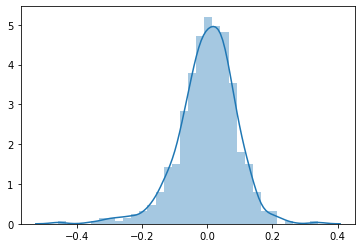

In [107]:
# calculating predicted values for y corresponding to x_train based on selected model
y_train_pred = lr12.predict(X_train_sm)
# calculating redidual: difference between actual y and predicted y
res = y_train - y_train_pred
# plotting residual
sns.distplot(res)
plt.show()

##### Observation :- Error Terms are normally distributed with mean equal to 0

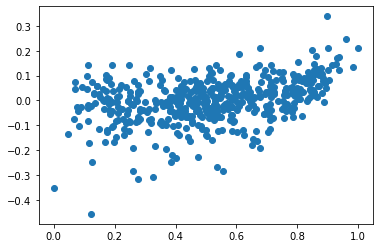

In [108]:
# Error terms are independent of each other
plt.scatter(y_train,res)
plt.show()

##### Observation: Error terms are independent of each other. No specific pattern observed

### Prediction & Evaluation on test set

In [109]:
# Scaling test dataframe. Same variables as in train data set.
df_test[scaler_var]=scaler.transform(df_test[scaler_var]) # only 'transform' using same 'scaler' that was defined in train data set

In [110]:
# Splitting X & y

y_test = df_test.pop('cnt')
X_test = df_test

In [111]:
# Dropping columns that were dropped from train data set during evaluating best model


X_test1 = X_test.drop(['mnth_Aug','mnth_Feb','mnth_Jun','mnth_Mar', 'mnth_May','mnth_Oct','weekday_Sat','weekday_Sun', 'weekday_Thu','weekday_Wed','workingday_Yes','hum'],axis=1)
X_test1.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weekday_Mon', 'weekday_Tue', 'weathersit_Light_Rain',
       'weathersit_Mist'],
      dtype='object')

In [112]:
# adding constant
X_test_sm = sm.add_constant(X_test1)

In [113]:
# Predicting using selected model 11
y_test_pred = lr12.predict(X_test_sm)

In [114]:
# Evaluation
r_squared = r2_score(y_test,y_test_pred)
mean_sq_error = mean_squared_error(y_test,y_test_pred)

In [115]:
# Evaluation result
print('R_Squared is: ',r_squared)
print('Mean Squared Error is: ',mean_sq_error)

R_Squared is:  0.8187298025708216
Mean Squared Error is:  0.008667303886252026


Text(0, 0.5, 'y_pred')

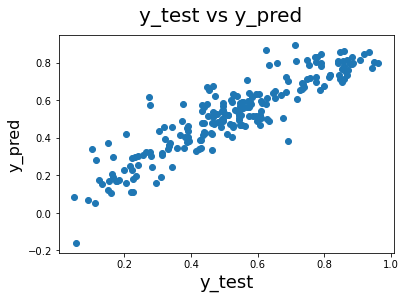

In [116]:
#model evaluation - plotting graph for actual vs pred data points.

plt.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Observation
#### In lr12 (our 13th model), having removed 12 insignificant features, we achieved following model parameters:
- r-squared (train): 0.843
- adj. r-squared (train): 0.838
- highest p-value feature: 'mnth_Nov' (p-value: 0.033) which is below 0.05
- highest VIF feature: 'temp' (VIF: 5.23) (close to our acceptable threshold)

- r_squared (test): 0.819
- mean_squared_error (test): 0.00866

#### Hence this model (lr12) seems better than lr11 as it gives an overall better model in terms of best feature significance (p-value<0.05) and least VIF (around 5) with not much difference in r-squared, adj. r-squared and MSE as compared to lr11

## Variable selection via RFE :Recursive Feature Elimination

In [117]:
# Splitting training and test data set in the ratio of 70:30 from the main data set
d_train, d_test = train_test_split(df,train_size=0.7,random_state=100)

In [118]:
# verifying so created structure

print(d_train.shape)
print(d_test.shape)

(510, 29)
(220, 29)


In [119]:
# Scaling numerical columns : to bring various features within a small interpretable range. Also, it significantly reduces time of convergence while gradient decent.

# initialising the MinMax scaler : (MinMax scaling also known as Normalization normalizes the value within range of 0-1)
scaler = MinMaxScaler()

# choosing the features to scale
# scaler_var = ['temp','hum','windspeed','cnt'] (variable already created)

# fitting on the data: scaling only selected/numerical features
d_train[scaler_var]=scaler.fit_transform(d_train[scaler_var]) # In 'fit_transform', 'fit' learns the min max of variables and 'transform' computes and applies the scaling over varibles

In [120]:
# reviewing scaled train data set
d_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light_Rain,weathersit_Mist
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Splitting data set

In [121]:
# splitting the data set further to independent(X_trn) and dependent/target(y_trn) variable
y_trn = d_train.pop('cnt')
X_trn = d_train

#### Model Building (using LR function of sklearn for its compatibility with RFE)

In [122]:
#initialising object for LinearRegression
lm = LinearRegression()

In [123]:
# fitting over X & y
lm.fit(X_trn,y_trn)

LinearRegression()

In [124]:
# executing RFE 
rfe = RFE(lm,17) # selecting best 17 features for output

In [125]:
# fitting over X & y
rfe = rfe.fit(X_trn,y_trn)

In [126]:
# zipping and displaying the output in list format
list(zip(X_trn.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 8),
 ('workingday_Yes', True, 1),
 ('weathersit_Light_Rain', True, 1),
 ('weathersit_Mist', True, 1)]

#### 1st column is feature name, 2nd column is rfe_support which tells if its recommended by RFE (top 17) as 'True', 3rd column is rfe_ranking which gives ranking to the all the features.

In [127]:
# selecting only those columns that are positively recommended by RFE
col = X_trn.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'workingday_Yes',
       'weathersit_Light_Rain', 'weathersit_Mist'],
      dtype='object')

In [128]:
# displaying only those columns that are negetively recommended by RFE
X_trn.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Building model using statsmodel (for statistics)

In [129]:
# adding constant term to the X_trn set with only RFE selected features
X_trn_sm = sm.add_constant(X_trn[col])

# applying 'Ordinary Least Square' method and fitting to create the LR model
lm = sm.OLS(y_trn, X_trn_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          4.39e-188
Time:                        13:38:11   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3433      0.037      9.270      0.000       0.271       0.416
temp                      0.4632      0.038     12.160      0.000       0.388       0.538
hum                      -0.1541      0.038     -4.083      0.000      -0.228      -0.080
windspeed                -0.1891      0.026     -7.364      0.000      -0.240      -0.139
season_spring            -0.0523      0.022     -2.380      0.018      -0.095      -0.009
season_summer             0.0394      0.015      2.563      0.011       0.009       0.070
season_winter             0.1006      0.018      5.603      0.000       0.065       0.136
yr_2019                   0.2308      0.008     28.673      0.000       0.215       0.247
mnth_Dec                 -0.0461      0.018     -2.515      0.012      -0.082      -0.010
mnth_Feb                 -0.0347      0.022     -1.603      0.109      -0.077       0.008
mnth_Jan                 -0.0622      0.021     -2.903      0.004      -0.104      -0.020
mnth_Jul                 -0.0546      0.018     -3.005      0.003      -0.090      -0.019
mnth_Nov                 -0.0427      0.019     -2.253      0.025      -0.080      -0.005
mnth_Sep                  0.0733      0.017      4.356      0.000       0.040       0.106
holiday_Yes              -0.1032      0.026     -3.902      0.000      -0.155      -0.051
workingday_Yes           -0.0191      0.009     -2.099      0.036      -0.037      -0.001
weathersit_Light_Rain    -0.2504      0.026     -9.513      0.000      -0.302      -0.199
weathersit_Mist          -0.0571      0.010     -5.453      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.549   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.504
Skew:                          -0.787   Prob(JB):                     1.05e-39
Kurtosis:                       5.443   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# calculating VIF (Variance Inflation factor)

vif0 = pd.DataFrame()
vif0['Features'] = X_trn[col].columns
vif0['VIF'] = [variance_inflation_factor(X_trn[col].values,i) for i in range(X_trn[col].shape[1])]
vif0['VIF'] = round(vif0['VIF'],2)
vif0 = vif0.sort_values(by='VIF',ascending=False)
vif0

,Features,VIF
1,hum,32.41
0,temp,18.49
3,season_spring,5.48
2,windspeed,4.77
5,season_winter,4.10
14,workingday_Yes,3.70
4,season_summer,2.85
9,mnth_Jan,2.38
16,weathersit_Mist,2.37
6,yr_2019,2.09


#### The first model with RFE (having excluded 11 features already), shows feature with highest p-value as 'mnth_Feb' = 0.109 and feature with highest VIF as 'hum' = 32.41. Thus, proceeding with manula elimination to achieve best model

In [131]:
X_trn_new = X_trn[col]

In [132]:
# Dropping 'mnth_Feb' variable from the train data set (X_train)
X_trn_new = X_trn_new.drop('mnth_Feb',axis=1)

# adding constant term to the X_trn set with only RFE selected features
X_trn_sm = sm.add_constant(X_trn_new)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lm = sm.OLS(y_trn, X_trn_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.19e-188
Time:                        13:38:11   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3321      0.036      9.117      0.000       0.261       0.404
temp                      0.4787      0.037     12.966      0.000       0.406       0.551
hum                      -0.1560      0.038     -4.129      0.000      -0.230      -0.082
windspeed                -0.1879      0.026     -7.309      0.000      -0.238      -0.137
season_spring            -0.0618      0.021     -2.919      0.004      -0.103      -0.020
season_summer             0.0426      0.015      2.791      0.005       0.013       0.073
season_winter             0.1023      0.018      5.698      0.000       0.067       0.138
yr_2019                   0.2305      0.008     28.594      0.000       0.215       0.246
mnth_Dec                 -0.0371      0.017     -2.125      0.034      -0.071      -0.003
mnth_Jan                 -0.0437      0.018     -2.417      0.016      -0.079      -0.008
mnth_Jul                 -0.0555      0.018     -3.055      0.002      -0.091      -0.020
mnth_Nov                 -0.0380      0.019     -2.026      0.043      -0.075      -0.001
mnth_Sep                  0.0748      0.017      4.442      0.000       0.042       0.108
holiday_Yes              -0.1058      0.026     -4.001      0.000      -0.158      -0.054
workingday_Yes           -0.0194      0.009     -2.125      0.034      -0.037      -0.001
weathersit_Light_Rain    -0.2490      0.026     -9.451      0.000      -0.301      -0.197
weathersit_Mist          -0.0568      0.010     -5.421      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.425
Skew:                          -0.747   Prob(JB):                     4.41e-37
Kurtosis:                       5.377   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# calculating VIF (Variance Inflation factor)

vif01 = pd.DataFrame()
vif01['Features'] = X_trn_new.columns
vif01['VIF'] = [variance_inflation_factor(X_trn_new.values,i) for i in range(X_trn_new.shape[1])]
vif01['VIF'] = round(vif01['VIF'],2)
vif01 = vif01.sort_values(by='VIF',ascending=False)
vif01

,Features,VIF
1,hum,31.85
0,temp,17.92
2,windspeed,4.76
3,season_spring,4.42
5,season_winter,4.10
13,workingday_Yes,3.69
4,season_summer,2.85
15,weathersit_Mist,2.37
6,yr_2019,2.09
10,mnth_Nov,1.85


#### While the p-values are now well within range(< 0.05), the VIF is as high as 31.85 for 'hum'. Hence proceeding further

In [134]:
# Dropping 'hum' variable from the train data set (X_train)
X_trn_new = X_trn_new.drop('hum',axis=1)

# adding constant term to the X_trn set with only RFE selected features
X_trn_sm = sm.add_constant(X_trn_new)

# applying 'Ordinary Least Square' method and fitting to create the LR model
lm = sm.OLS(y_trn, X_trn_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          3.69e-186
Time:                        13:38:11   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2627      0.033      8.000      0.000       0.198       0.327
temp                      0.4373      0.036     12.112      0.000       0.366       0.508
windspeed                -0.1589      0.025     -6.323      0.000      -0.208      -0.110
season_spring            -0.0715      0.021     -3.341      0.001      -0.114      -0.029
season_summer             0.0356      0.015      2.305      0.022       0.005       0.066
season_winter             0.0880      0.018      4.915      0.000       0.053       0.123
yr_2019                   0.2343      0.008     28.811      0.000       0.218       0.250
mnth_Dec                 -0.0444      0.018     -2.514      0.012      -0.079      -0.010
mnth_Jan                 -0.0500      0.018     -2.734      0.006      -0.086      -0.014
mnth_Jul                 -0.0506      0.018     -2.745      0.006      -0.087      -0.014
mnth_Nov                 -0.0387      0.019     -2.029      0.043      -0.076      -0.001
mnth_Sep                  0.0683      0.017      4.007      0.000       0.035       0.102
holiday_Yes              -0.1087      0.027     -4.046      0.000      -0.161      -0.056
workingday_Yes           -0.0223      0.009     -2.413      0.016      -0.040      -0.004
weathersit_Light_Rain    -0.2927      0.025    -11.935      0.000      -0.341      -0.245
weathersit_Mist          -0.0819      0.009     -9.414      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       74.623   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.133
Skew:                          -0.766   Prob(JB):                     5.66e-39
Kurtosis:                       5.437   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# calculating VIF (Variance Inflation factor)

vif02 = pd.DataFrame()
vif02['Features'] = X_trn_new.columns
vif02['VIF'] = [variance_inflation_factor(X_trn_new.values,i) for i in range(X_trn_new.shape[1])]
vif02['VIF'] = round(vif02['VIF'],2)
vif02 = vif02.sort_values(by='VIF',ascending=False)
vif02

,Features,VIF
0,temp,6.11
1,windspeed,4.69
12,workingday_Yes,3.58
2,season_spring,3.08
4,season_winter,3.08
3,season_summer,2.33
5,yr_2019,2.07
9,mnth_Nov,1.82
7,mnth_Jan,1.66
8,mnth_Jul,1.59


 - Model looks good now against all the parameters

### Residual Analysis

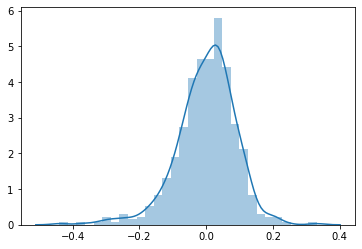

In [136]:
# calculating predicted values for y corresponding to x_trn based on selected model
y_trn_pred = lm.predict(X_trn_sm)
# calculating redidual: difference between actual y and predicted y
res=y_trn - y_trn_pred
# plotting residual
sns.distplot(res)
plt.show()

##### Observation :- Error Terms are normally distributed with mean equal to 0

### Prediction & Evaluation on test set

In [137]:
# Scaling test dataframe. Same variables as in train data set.
d_test[scaler_var]=scaler.transform(d_test[scaler_var])

In [138]:
# Splitting X & y

y_test = d_test.pop('cnt')
X_test = d_test

In [139]:
# Dropping columns that were dropped from train data set during evaluating best model (RFE+manual)


X_test1 = X_test.drop(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct','weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu','weekday_Tue', 'weekday_Wed','mnth_Feb','hum'],axis=1)
X_test1.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'workingday_Yes', 'weathersit_Light_Rain',
       'weathersit_Mist'],
      dtype='object')

In [140]:
# adding constant
X_test_sm = sm.add_constant(X_test1)

In [141]:
# Predicting using selected model 11
y_test_pred = lm.predict(X_test_sm)

In [142]:
# Evaluation
r_squared = r2_score(y_test,y_test_pred)
mean_sq_error = mean_squared_error(y_test,y_test_pred)

In [143]:
# Evaluation result
print('R_Squared is: ',r_squared)
print('Mean Squared Error is: ',mean_sq_error)

R_Squared is:  0.8162913619942512
Mean Squared Error is:  0.008783896165542511


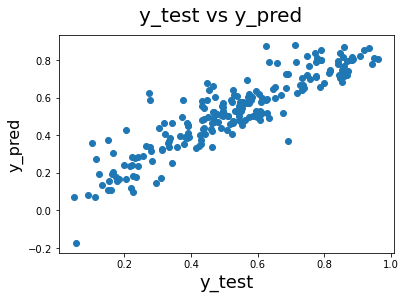

In [144]:
#model evaluation - plotting graph for actual vs pred data points.

plt.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### Observation
#### In our 3rd model, having removed 11 insignificant features by RFE and 2 manully (overall: 13 eliminated), we achieved following model parameters:
- r-squared (train): 0.841
- adj. r-squared (train): 0.836
- highest p-value feature: 'mnth_Nov' (p-value: 0.043) which is below 0.05
- highest VIF feature: 'temp' (VIF: 6.11) (close to our acceptable threshold 5)

- r-squared (test): 0.816
- mean_squared_error (test): 0.00878

# Conclusion

#### Comparing the 3 possible models:
- lr11 : with 11 features removed manually
- lr12 : with 12 features removed manually
- lm   : with 11 (RFE) + 2 (manual), overall 13 feature removed

#### We can drop 'lr11' as its having a very high VIF feature.
#### Among lr12 & lm : lr12 seems better than lm (marginally) though it has 1 extra feature than lm. Thus will go with lr12 in this case.

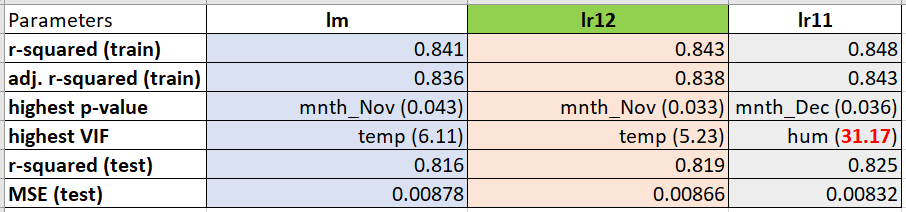